# https://seaborn.pydata.org/tutorial.html


- sesaborn 공식 tutorial 사이트 정리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Seaborn : 
1. Visualizing Statistical relationships 

 - 시각화는 데이터를 한 눈에 보여주는 것이다.
 - 그런데 변수간의 관계냐, 선형회귀식이냐, 구성비율을 나타내냐 등 데이터가 보여주고자 하는 것이 무엇이냐에 따라서 활용해야 할 툴이 달라짐
 - 이 장에서는 Statistical Relationships 를 보여줄 수 있는 replot()을 가지고 실습할 것.
 
 
 
 - replot 은 scatterplot()과 lineplot()으로 둘 다 활용할 수 있음!! 내가 kind를 어떻게 주느냐에 따라 다름!
 (kind의 디폴트값은 scatterplot이라서 산점도 그래프를 그릴 때는 특별한 명령을 안 주어도 된다. kind="scatter"이라고 주어도 무방함.)
 

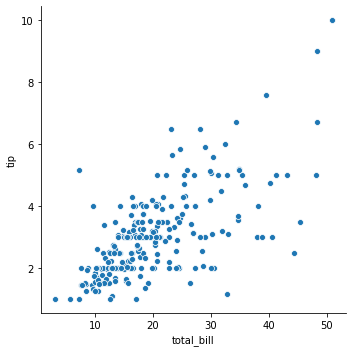

In [2]:
# seaborn에 내장된 데이터 셋을 불러오자 
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y ="tip", data=tips)

위 산점도는 2차원이다. 그런데 여기서 하나의 변수를 더 추가하고 싶다면? 색깔을 바꾸어줄 수 있음.

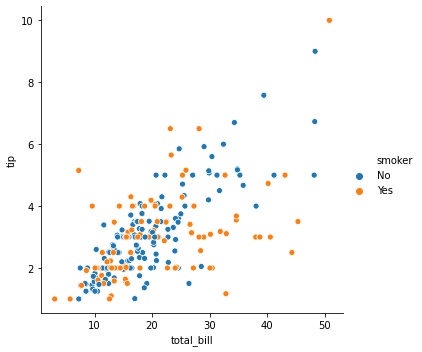

In [4]:
sns.relplot(x="total_bill", y="tip", hue = "smoker", data=tips);

 - 위 산점도는 공식 튜토리얼에서 그리는 코드를 그대로 따온 것이다. 
 
 
 
 ? 그런데 , hue가 뭔가?? hue= smoker 라면, smoker인지 여부를 색깔로 나타내라는 것이다.
 
 일단 우리는 hue를 잘 활용하려면 data가 어떻게 구성되어있는지부터 이해해야할 것이다
 
 

그래서 tips를 보자

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


tips를 보면, smoker 말고도 다양한 변수를 넣어볼 수 있다 . 예를들어 하나만 해보면 time을 넣어보자.


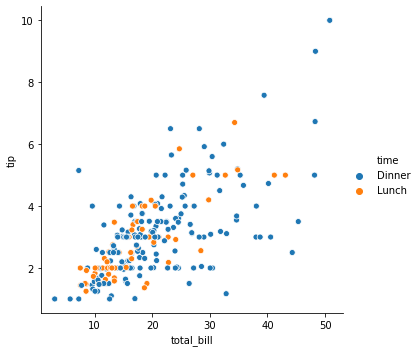

In [6]:
sns.relplot(x="total_bill", y="tip", hue = "time", data=tips);


style

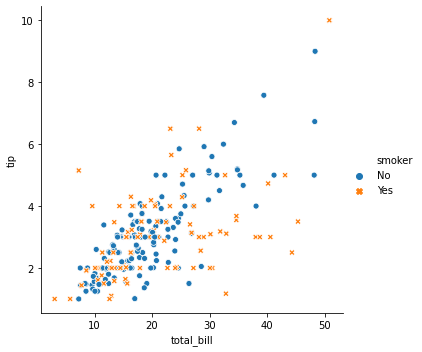

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

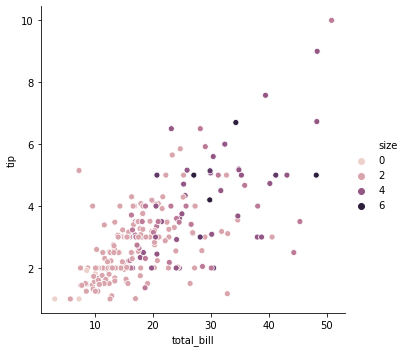

In [8]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

또 위의 산점도처럼 hue를 size같이 범주형이아니라, numeric이면
seaborn이 이 색깔을 연속형으로 바꾸어준다. 즉 딱 떨어지는 색이 아니라
정도에 따라 옅고 짙고를 나타내어 연속형자료를 표현한다


다음은 색깔을 바꾸는것이다. 

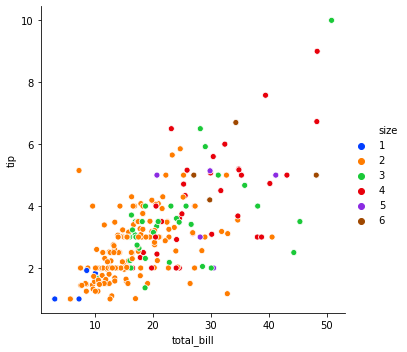

In [9]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="bright", data=tips);

팔레트 색깔은 deep, muted, pastel, bright, dark,colorblind 등 다양한 것이 있고,
seaborn tutorial>color_palettes. 부분에서 찾을 수 있다 .

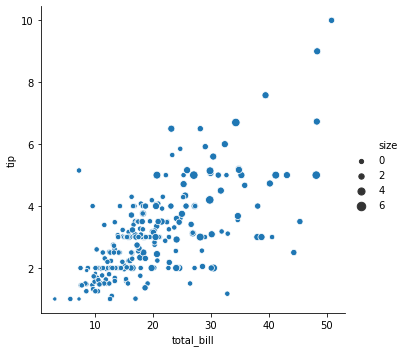

In [10]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

이렇게 사이즈를 조절할 수도 있다. size

sizes에 들어가는 숫자는 작은 것부터 제일 큰 것 까지의 범위같다.

sizes (15,200) / (1,200) 을 비교해보고
sizes (15,200) / (100,200) 이렇게 비교해보면 비교가 쉽다 . 실습해보자

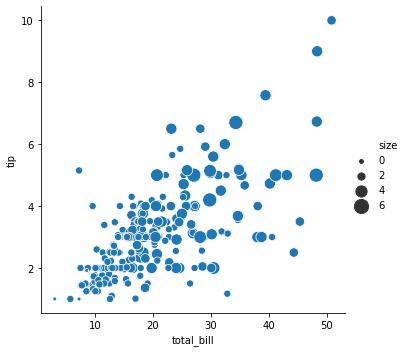

In [11]:
sns.relplot(x="total_bill", y="tip", size='size',  sizes=(15,200), data=tips);

# Emphasizing continuity with line plots

scatterplot으로만 가지고는 힘든 경우도 있다. 시각화에 만병통치약은 없기 때문이다.
그때그때 자료에 맞추어 시각화하는 게 필요하다. 
- 만약 시간에 따른 변화 추이를 알고 싶다면 이렇게 line그래프로 그려볼 수 있다 .

fig는 일종의 도화지라고 생각하면 된다고 한다. 
axes는 plot이 그려지는 공간이고,
axis는 plot의 축이다. 관련내용은

 - https://zzsza.github.io/development/2018/08/24/data-visualization-in-python/
 - 에서 확인해볼 수 있다 .

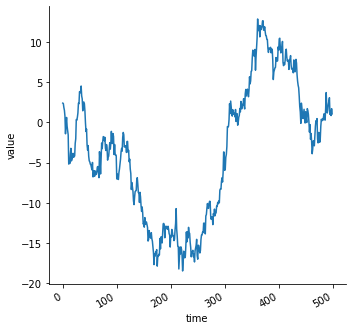

In [12]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

이런식으로 line graph는 x에 따른 y값을 그리는 것으로 보통 이용된다.

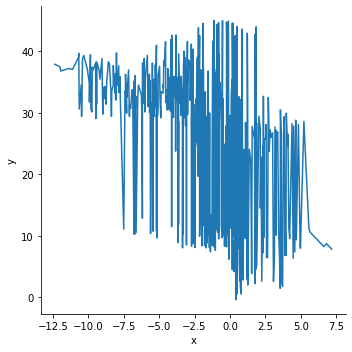

In [13]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=True, kind="line", data=df);

# Showing multiple relationships with facets

 변수간의 관계를 봤는데, 만약 어떤 변수가 더 설명력이 강한지 알고 싶다면?
 - 공식사이트는 이렇게 나옴 
 
 - "you make multiple axes and plot subsets of the data on each of them"

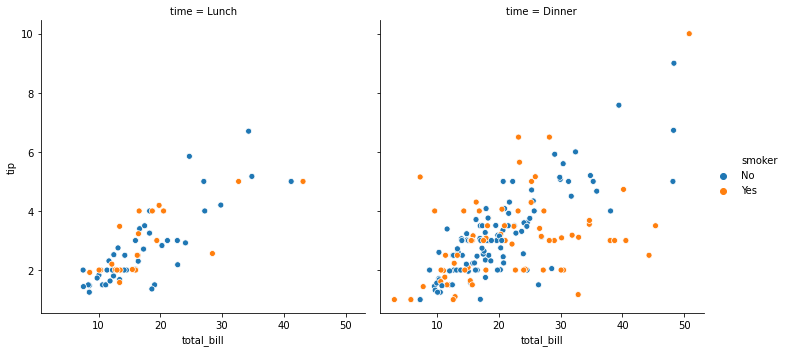

In [25]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

# 이렇게 하면 두 개가 나오는데, time에 따라서 Lunch가 팁이 많은지 Dinner 가 많은지를
# 알 수 있다 !

# 만약 col = 에다가 다른 값을 주면 그값을 대상으로 비교함

In [20]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# 2. Plotting with categorical data

# 여지껏 numerical 변수간의 관계에 집중해 왔다면, 이제는 categorical 변수 - 즉 범주가 나누어지는 그룹들 - 에 집중해 보도록 함.

# 유의할 것 - : catplot을 씀. 이거는 boxplot,violionplot, barplot등 여러 그림의 상위 인터페이스임. 따라서 catplot하나로 변수들을 조정해 박스, 바이올린,막대 형태 등 여러가지를 재현할 수 있음 !!!

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes = True)

catplot - scatterplot . 즉 산점도를 여러개로. 하나의 축에 따라서 그림.


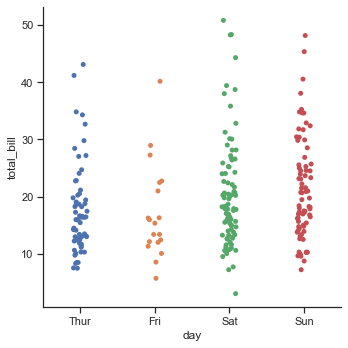

In [10]:
tips = sns.load_dataset("tips")
sns.catplot(x = 'day', y ='total_bill', data = tips)

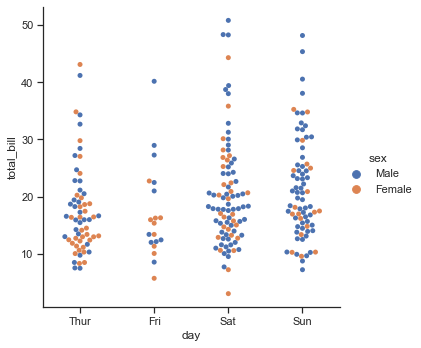

In [19]:
# hue 변수를 이용하면 - 그 안에서도 또 다른 변수를 구분할 수 있음 ! 색을 다르게 구분.

sns.catplot(x='day', y='total_bill', hue='sex', kind='swarm', data=tips)



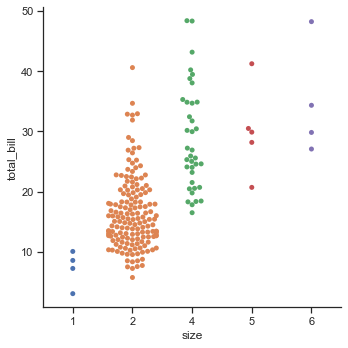

In [21]:
# 이렇게 데이터에서 일부만 표시하는 것도 가능하다!
sns.catplot(x="size",y="total_bill",kind="swarm",data=tips.query("size != 3"))

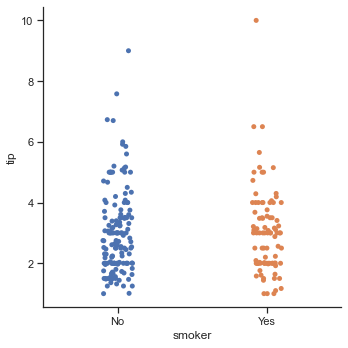

In [25]:
# order 변수를 입력하면 내가 원하는 order로 뽑아낼 수 있다 .
sns.catplot(x='smoker', y='tip', order=['No','Yes'], data=tips)


# 근데 이제 가로축이 너무 범주와 분포가 많아져서 표현하기  어려우면 ? --> 이 경우엔 그 분포를 재조정할 수 있음. 

예를 들면 Boxplot이 있는데, 이건 분위수로 나타내는 것이다

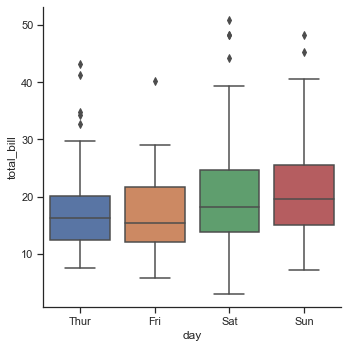

In [27]:
sns.catplot(x='day', y='total_bill', kind='box', data=tips)

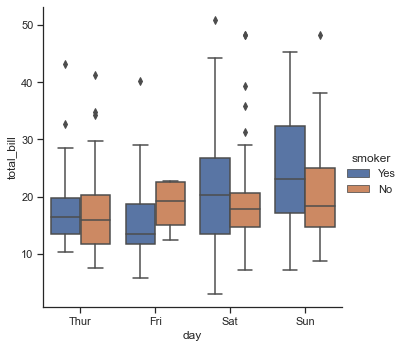

In [28]:
sns.catplot(x='day', y='total_bill', hue='smoker', kind='box', data=tips)

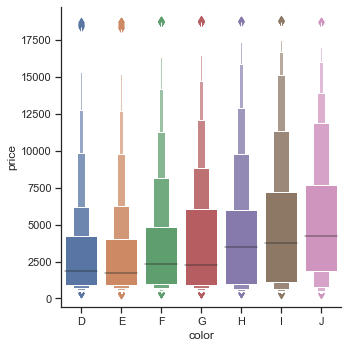

In [30]:
# 더 큰 dataset를 다루면서 더 자세한 정보를 원할 때는 boxen을 쓴다
# boxen은 다음과같이 분포 모양에 대한 자세한 그림을 보여준다.
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));


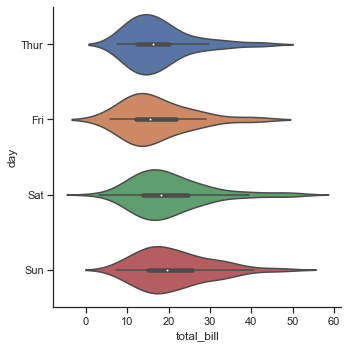

In [33]:
#바이올린 형태도 있음.
sns.catplot(x= "total_bill", y="day", hu="sex", kind="violin", data= tips)

## 이젠 막대그래프. 막대그래프는 어디가 많이 쏠려있는지를 더 잘 알게 해 줌. 

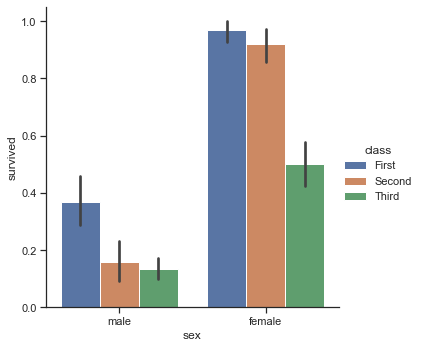

In [39]:

titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived",hue="class",kind="bar",data=titanic)

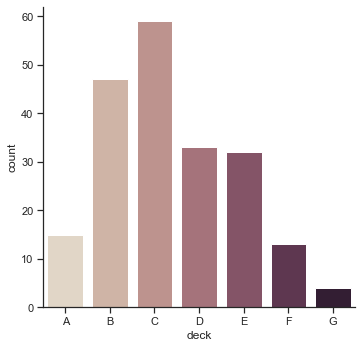

In [40]:
# 이렇게도 가능하다. 각 범주마다 어느 정도인지 표시.


sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

다음은 포인트 플롯 - pointplot() 

- 변수간 관계와 차이를 직관적으로 알 수 있게 기울기를 활용함.

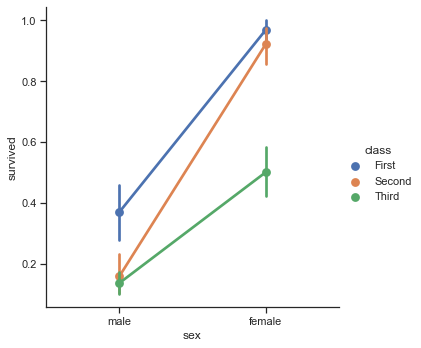

In [41]:
sns.catplot(x ="sex", y="survived", hue="class", kind="point", data=titanic)

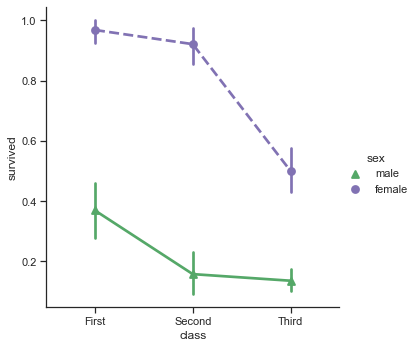

In [45]:
# 포인트플롯을 색상과 마커, 선 스타일 등을 변형시킬 수 있음.
# 자세한 것은 필요할 때 공식사이트에 들어가서 보자
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

# 3. Visualizing the distribution of a dataset


 - 변수간의 관계가 아니라 distribution. 즉 분포에 대해 알아본다
 
 
 - 그런데 이 부분은 기초 통계 지식이 있어야 그래프에 쓰인 개념들을 이해할 수 있을 것 같다
- 분포와 관련되어 어떤 시각화가 있는지 정도를 알아두자.

distribution은 distplot을 통해 그릴 수 있다.

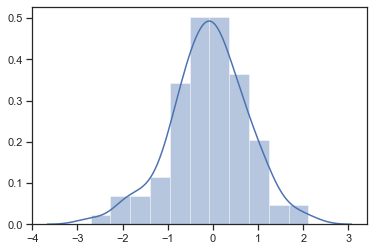

In [60]:
x = np.random.normal(size=100)
sns.distplot(x)

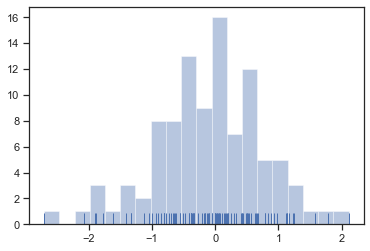

In [61]:
# Histogram 그리기
sns.distplot(x, bins=20, kde=False, rug=True)

# 여기서 kde와 rug를 안 한 코드들을 실행해보면 뭔지 알 수 있다.
#kde는 히스토그램 각 막대를 잇는 선이고, rug는 그 밑에 자잘한 선이다.
# bins는 밑 막대들 숫자다


 - scatterplot으로 밀도를 나타낼 수도 있음.

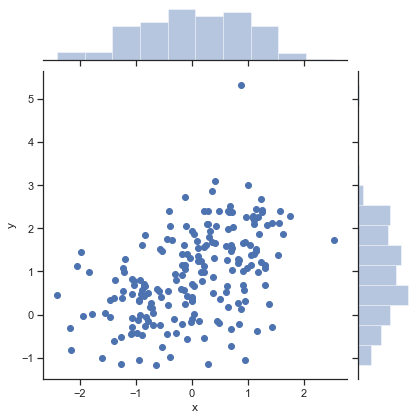

In [63]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df);

Hexbin plot 는 matplotlib에서 가능. 

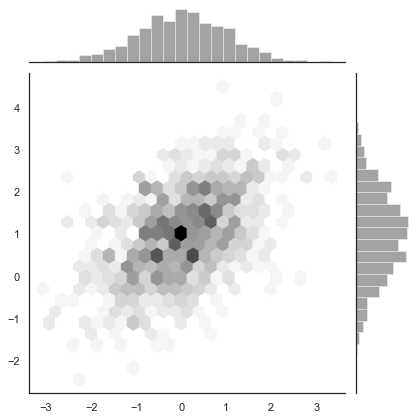

In [64]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

,x,y
0,-0.092300,-0.575873
1,-0.176410,1.409157
2,1.109080,2.102417
3,-0.579581,0.556836
4,-1.033844,0.771957
...,...,...
195,0.290261,-1.154818
196,-0.932183,0.812942
197,0.642786,2.407671
198,-0.397741,2.054912


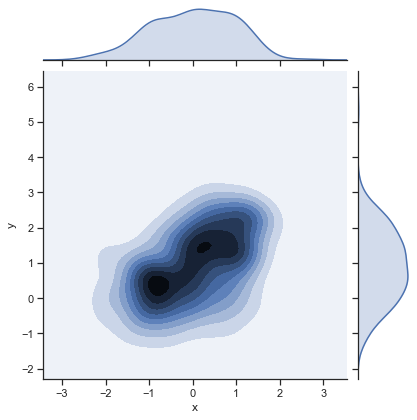

In [86]:
# 이것도 한 눈에 보여준다 . 나중에 써먹을 수 있겠음.

# 그런데 이 data가 어떤 형태여야 하는지는 잘 모르겠음.

sns.jointplot(x="x", y="y", data=df, kind="kde");

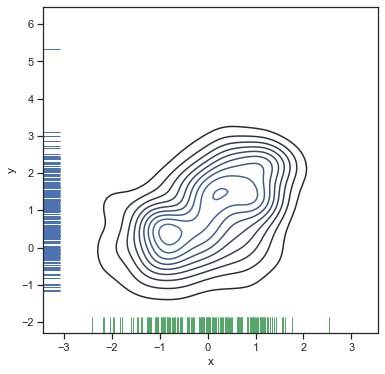

In [87]:
# 사용법 정확히는 모르겠음.
# 이런게 있다고 알아두고 나중에 필요할 때 알아보자.
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

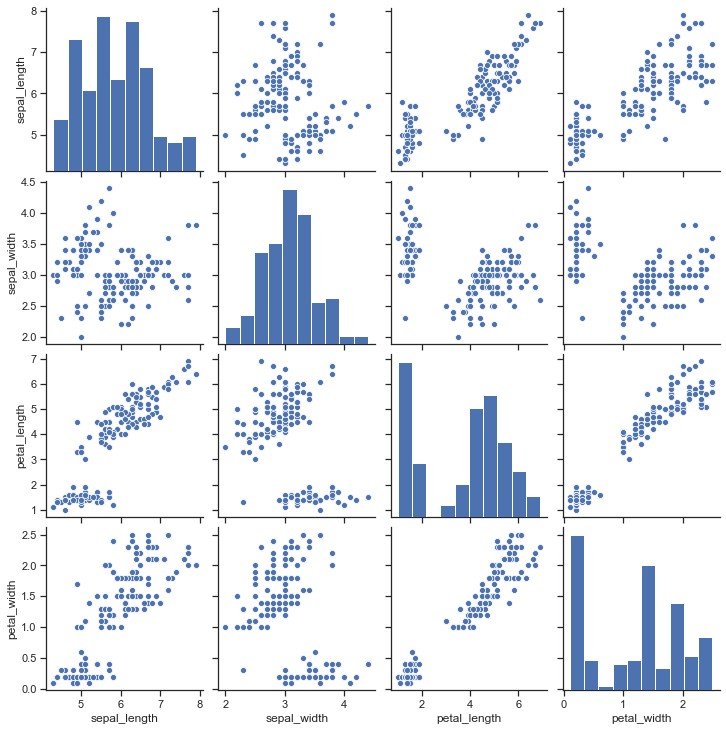

In [98]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)

 - 이런식으로도 응용 가능. 타이타닉 표에서 int값들만 가지고 이렇게 그려볼 수도 있음. 

C:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


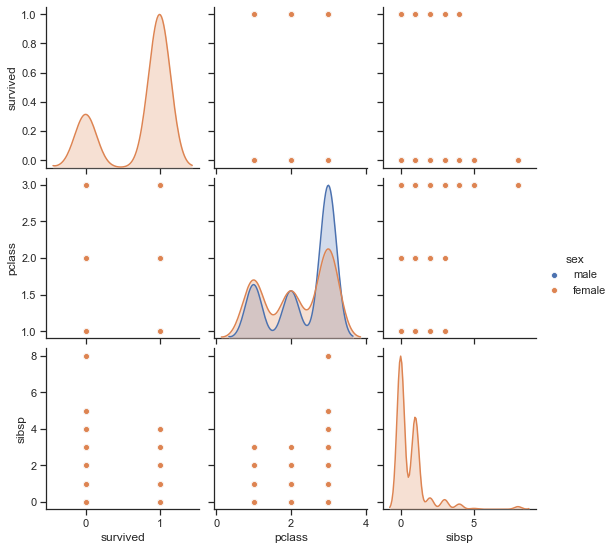

In [102]:
titanic.dtypes
a= titanic[['survived','pclass','sibsp','sex']]
sns.pairplot(a, hue="sex")

# hue를 넣어줄 수 있음!

### 조금 더 심화한 파트인데, 나도 정확히 이해는 안 됨.  Pair Grid라고 조건을 추가하여 심화된 분석인데.... 이건 변수들이 뭔지 알아야 할듯함. 이해 x

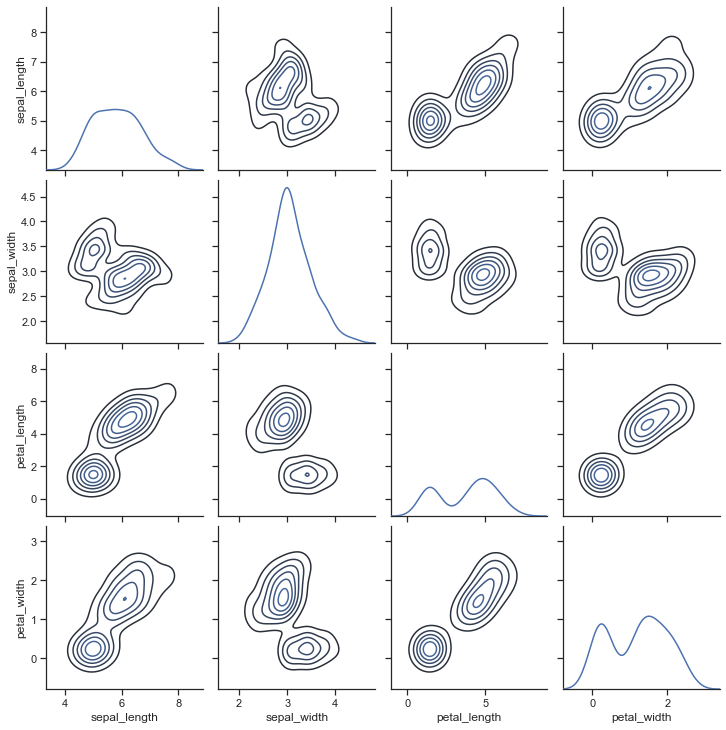

In [105]:
# seaborn.PairGrid 
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

# 4. Visualizing linear relationships

- 이 파트도 되게 유용하게 잘 쓰일 것 같다. 